In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
# print(digits.data)
# print(digits.target)
# print(digits.target_names)
# print(digits.images)
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [4]:
X = digits.data
X.shape

(1797, 64)

In [5]:
y = digits.target
y.shape

(1797,)

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
X[10]

array([ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
       14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
       16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
        0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
       10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.])

In [8]:
some_digit = X[666]
print(some_digit)
# 666 对应的是 y
print(y[666])

[ 0.  0.  5. 15. 14.  3.  0.  0.  0.  0. 13. 15.  9. 15.  2.  0.  0.  4.
 16. 12.  0. 10.  6.  0.  0.  8. 16.  9.  0.  8. 10.  0.  0.  7. 15.  5.
  0. 12. 11.  0.  0.  7. 13.  0.  5. 16.  6.  0.  0.  0. 16. 12. 15. 13.
  1.  0.  0.  0.  6. 16. 12.  2.  0.  0.]
0


[[ 0.  0.  5. 15. 14.  3.  0.  0.]
 [ 0.  0. 13. 15.  9. 15.  2.  0.]
 [ 0.  4. 16. 12.  0. 10.  6.  0.]
 [ 0.  8. 16.  9.  0.  8. 10.  0.]
 [ 0.  7. 15.  5.  0. 12. 11.  0.]
 [ 0.  7. 13.  0.  5. 16.  6.  0.]
 [ 0.  0. 16. 12. 15. 13.  1.  0.]
 [ 0.  0.  6. 16. 12.  2.  0.  0.]]


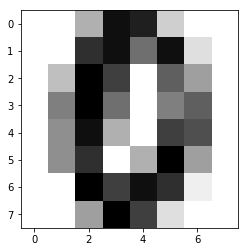

In [9]:
# 可视化处理
some_digit_image = some_digit.reshape(8, 8)
print(some_digit_image)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)

In [10]:
from playML.model_selection import train_test_split
from playML.kNN import KNNClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1438, 64)
(359, 64)
(1438,)
(359,)


In [12]:
knn_clf = KNNClassifier(k=3)
knn_clf.fit(X_train, y_train)

KNN(k=3)

In [13]:
y_predict = knn_clf.predict(X_test)
print(y_predict)
print(y_test)

[6 0 1 3 6 0 4 5 7 0 0 8 3 0 2 6 4 8 5 9 7 1 9 4 6 9 3 4 2 6 9 0 4 2 1 0 5
 1 1 1 4 9 8 4 7 5 5 9 6 0 9 2 7 4 7 7 7 5 6 3 4 7 7 5 5 3 4 3 4 1 8 8 8 8
 5 5 0 5 0 6 6 8 6 4 6 4 8 5 9 4 7 0 5 4 2 7 4 2 9 3 3 8 9 3 0 4 7 0 7 2 9
 4 7 0 6 1 7 9 0 0 2 7 6 4 2 3 6 7 1 9 9 8 6 6 9 5 8 4 5 2 8 0 3 2 0 6 3 5
 9 1 7 6 8 9 0 6 0 5 7 1 4 2 1 5 8 5 5 9 7 7 4 1 1 4 4 5 9 0 4 0 3 6 1 1 3
 1 3 2 3 3 9 9 2 5 6 6 6 1 4 9 6 9 0 2 3 4 3 3 8 2 3 2 2 6 5 3 2 0 6 8 7 6
 2 2 3 6 0 1 2 9 7 4 7 1 5 8 2 6 7 0 3 0 7 7 7 9 5 0 0 1 2 6 6 7 8 9 9 6 0
 5 5 7 5 1 9 2 7 7 0 8 7 8 5 3 1 5 2 8 3 1 0 0 2 4 2 2 6 7 2 6 7 4 7 2 4 9
 8 3 9 3 8 8 7 0 1 6 6 5 3 0 5 2 2 5 4 9 8 5 5 5 7 5 2 3 7 9 5 5 4 0 4 6 9
 2 2 2 6 3 3 5 5 4 4 2 3 7 8 1 5 5 4 6 9 4 1 7 6 9 2]
[6 0 1 3 6 0 4 5 7 0 0 8 3 0 2 6 4 8 5 9 7 1 9 4 6 9 3 4 2 6 9 0 4 2 1 0 5
 1 1 1 4 9 8 4 7 5 5 9 5 0 9 2 7 4 7 7 7 5 6 3 4 7 7 5 5 3 4 3 4 1 8 8 8 8
 5 5 0 5 0 6 6 8 6 4 6 4 8 5 9 4 7 0 5 4 2 7 4 2 9 3 3 8 9 3 0 4 7 0 7 2 9
 4 7 0 6 1 7 9 0 0 2 7 6 4 2 3 6 7 1 9 9 8 6 6

In [14]:
print(sum(y_predict == y_test) / len(y_test))

0.9916434540389972


In [16]:
from playML.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

# 使用 kNN 中封装的 score
print(knn_clf.score(X_test, y_test))

0.9916434540389972
0.9916434540389972


# scikit-learn 中的 accuracy_score

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [27]:
knn_clf.fit(X_train, y_train)

KNN(k=3)

In [28]:
X_test.shape

(360, 64)

In [30]:
y_predict = knn_clf.predict(X_test)

In [31]:
y_predict.shape

(360,)

In [32]:
# 预测
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, y_predict)
knn_clf.score(X_test, y_test)

0.9805555555555555

# Grid Search

In [37]:
param_grid = [
    {
        'weights': ['uniform'],
        'n_neighbors': [i for i in range(1, 11)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)],
        'p': [i for i in range(1, 6)]
    }
]

In [41]:
knn_clf = KNeighborsClassifier()

In [46]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn_clf, param_grid)

In [47]:
%%time
grid_search.fit(X_train, y_train)

CPU times: user 1min 53s, sys: 392 ms, total: 1min 53s
Wall time: 1min 54s


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=3,
           weights='distance')

In [51]:
grid_search.best_score_

0.9874739039665971

In [52]:
grid_search.best_params_

{'n_neighbors': 1, 'p': 3, 'weights': 'distance'}

In [54]:
knn_clf = grid_search.best_estimator_
knn_clf.predict(X_test)

array([4, 3, 4, 2, 5, 6, 3, 9, 5, 1, 4, 1, 4, 3, 0, 3, 9, 7, 8, 5, 3, 2,
       3, 3, 3, 3, 5, 4, 7, 4, 0, 5, 1, 5, 7, 7, 1, 0, 1, 7, 3, 1, 7, 0,
       7, 6, 3, 6, 3, 0, 6, 9, 5, 0, 2, 2, 9, 7, 5, 4, 1, 6, 3, 0, 9, 0,
       9, 6, 6, 3, 4, 0, 3, 2, 7, 4, 1, 0, 6, 5, 5, 6, 8, 2, 5, 4, 4, 8,
       9, 0, 4, 7, 3, 7, 7, 5, 9, 8, 8, 7, 5, 1, 3, 1, 4, 5, 2, 2, 9, 4,
       1, 2, 2, 1, 4, 2, 3, 0, 9, 2, 3, 9, 0, 7, 8, 3, 5, 4, 4, 2, 4, 4,
       7, 9, 0, 7, 4, 4, 0, 3, 7, 7, 0, 7, 8, 0, 3, 2, 3, 1, 8, 5, 0, 9,
       1, 0, 1, 1, 2, 5, 0, 2, 1, 7, 8, 0, 6, 4, 0, 8, 3, 3, 1, 1, 3, 4,
       9, 8, 3, 2, 6, 1, 6, 5, 6, 9, 3, 7, 6, 9, 6, 8, 3, 0, 7, 5, 1, 0,
       2, 0, 2, 0, 9, 1, 6, 7, 1, 8, 1, 1, 6, 0, 9, 5, 2, 3, 9, 5, 6, 8,
       6, 6, 6, 4, 8, 7, 3, 1, 9, 3, 1, 5, 1, 3, 1, 6, 0, 6, 1, 2, 8, 2,
       8, 9, 1, 1, 7, 2, 3, 8, 9, 6, 2, 9, 8, 4, 2, 0, 6, 1, 0, 9, 3, 9,
       3, 2, 3, 0, 3, 3, 0, 6, 2, 5, 7, 6, 3, 8, 9, 7, 2, 8, 3, 6, 9, 3,
       1, 7, 2, 6, 5, 2, 9, 0, 4, 5, 7, 0, 4, 2, 6,

In [55]:
knn_clf.score(X_test, y_test)

0.9888888888888889

In [59]:
%%time
# n_jobs 多核心操作
# verbose 显示处理的输出
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] n_neighbors=1, weights=uniform ..................................
[CV] n_neighbors=1, weights=uniform ..................................
[CV] n_neighbors=1, weights=uniform ..................................
[CV] n_neighbors=2, weights=uniform ..................................
[CV] n_neighbors=2, weights=uniform ..................................
[CV] n_neighbors=2, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.6s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.7s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.7s
[CV] n_neighbor

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.6s


[CV] ............. n_neighbors=1, p=2, weights=distance, total=   0.1s
[CV] n_neighbors=1, p=3, weights=distance ............................
[CV] ............. n_neighbors=1, p=2, weights=distance, total=   0.1s
[CV] n_neighbors=1, p=3, weights=distance ............................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.8s
[CV] n_neighbors=1, p=3, weights=distance ............................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.8s
[CV] n_neighbors=1, p=4, weights=distance ............................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.8s
[CV] n_neighbors=1, p=4, weights=distance ............................
[CV] ............. n_neighbors=1, p=3, weights=distance, total=   0.7s
[CV] n_neighbors=1, p=4, weights=distance ............................
[CV] ............. n_neighbors=1, p=3, weights=distance, total=   0.7s
[CV] n_neighbors=1, p=5, weights=distance ............................
[CV] .

[CV] ............. n_neighbors=4, p=3, weights=distance, total=   0.8s
[CV] n_neighbors=5, p=2, weights=distance ............................
[CV] ............. n_neighbors=5, p=1, weights=distance, total=   0.1s
[CV] n_neighbors=5, p=2, weights=distance ............................
[CV] ............. n_neighbors=5, p=1, weights=distance, total=   0.1s
[CV] n_neighbors=5, p=3, weights=distance ............................
[CV] ............. n_neighbors=5, p=2, weights=distance, total=   0.1s
[CV] n_neighbors=5, p=3, weights=distance ............................
[CV] ............. n_neighbors=5, p=2, weights=distance, total=   0.1s
[CV] n_neighbors=5, p=3, weights=distance ............................
[CV] ............. n_neighbors=5, p=1, weights=distance, total=   0.1s
[CV] n_neighbors=5, p=4, weights=distance ............................
[CV] ............. n_neighbors=5, p=2, weights=distance, total=   0.1s
[CV] n_neighbors=5, p=4, weights=distance ............................
[CV] .

[CV] ............. n_neighbors=8, p=4, weights=distance, total=   0.8s
[CV] n_neighbors=9, p=1, weights=distance ............................
[CV] ............. n_neighbors=8, p=4, weights=distance, total=   0.8s
[CV] n_neighbors=9, p=2, weights=distance ............................
[CV] ............. n_neighbors=9, p=1, weights=distance, total=   0.1s
[CV] n_neighbors=9, p=2, weights=distance ............................
[CV] ............. n_neighbors=9, p=1, weights=distance, total=   0.1s
[CV] n_neighbors=9, p=2, weights=distance ............................


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   29.7s


[CV] ............. n_neighbors=9, p=1, weights=distance, total=   0.1s
[CV] n_neighbors=9, p=3, weights=distance ............................
[CV] ............. n_neighbors=9, p=2, weights=distance, total=   0.1s
[CV] n_neighbors=9, p=3, weights=distance ............................
[CV] ............. n_neighbors=9, p=2, weights=distance, total=   0.1s
[CV] n_neighbors=9, p=3, weights=distance ............................
[CV] ............. n_neighbors=9, p=2, weights=distance, total=   0.1s
[CV] n_neighbors=9, p=4, weights=distance ............................
[CV] ............. n_neighbors=8, p=4, weights=distance, total=   0.8s
[CV] n_neighbors=9, p=4, weights=distance ............................
[CV] ............. n_neighbors=8, p=5, weights=distance, total=   0.9s
[CV] n_neighbors=9, p=4, weights=distance ............................
[CV] ............. n_neighbors=8, p=5, weights=distance, total=   1.0s
[CV] n_neighbors=9, p=5, weights=distance ............................
[CV] .

[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   37.2s finished
